In [3]:
import pandas as pd

# Read and process data from 2104.xls
file_path_2104 = './data/weather/2104.xls'
df_2104 = pd.read_excel(file_path_2104)
df_2104['北京时(UTC+8)'] = pd.to_datetime(df_2104['北京时(UTC+8)'])
filtered_df_2104 = df_2104[df_2104['北京时(UTC+8)'].dt.strftime('%Y-%m-%d') == '2021-04-16']
filtered_df_2104 = filtered_df_2104[['气温(℃)', '北京时(UTC+8)']]
df_t_2104 = filtered_df_2104.T
df_t_2104.columns = [time.strftime('%H:%M-') + (time + pd.Timedelta(hours=1)).strftime('%H:%M') for time in filtered_df_2104['北京时(UTC+8)']]
df_t_2104 = df_t_2104.drop(index='北京时(UTC+8)')

# Read and process data from 2107.xls
file_path_2107 = './data/weather/2107.xls'
df_2107 = pd.read_excel(file_path_2107)
df_2107['北京时(UTC+8)'] = pd.to_datetime(df_2107['北京时(UTC+8)'])
filtered_df_2107 = df_2107[df_2107['北京时(UTC+8)'].dt.strftime('%Y-%m-%d') == '2021-07-09']
filtered_df_2107 = filtered_df_2107[['气温(℃)', '北京时(UTC+8)']]
filtered_df_2107['气温(℃)']+=3
df_t_2107 = filtered_df_2107.T
df_t_2107.columns = [time.strftime('%H:%M-') + (time + pd.Timedelta(hours=1)).strftime('%H:%M') for time in filtered_df_2107['北京时(UTC+8)']]
df_t_2107 = df_t_2107.drop(index='北京时(UTC+8)')



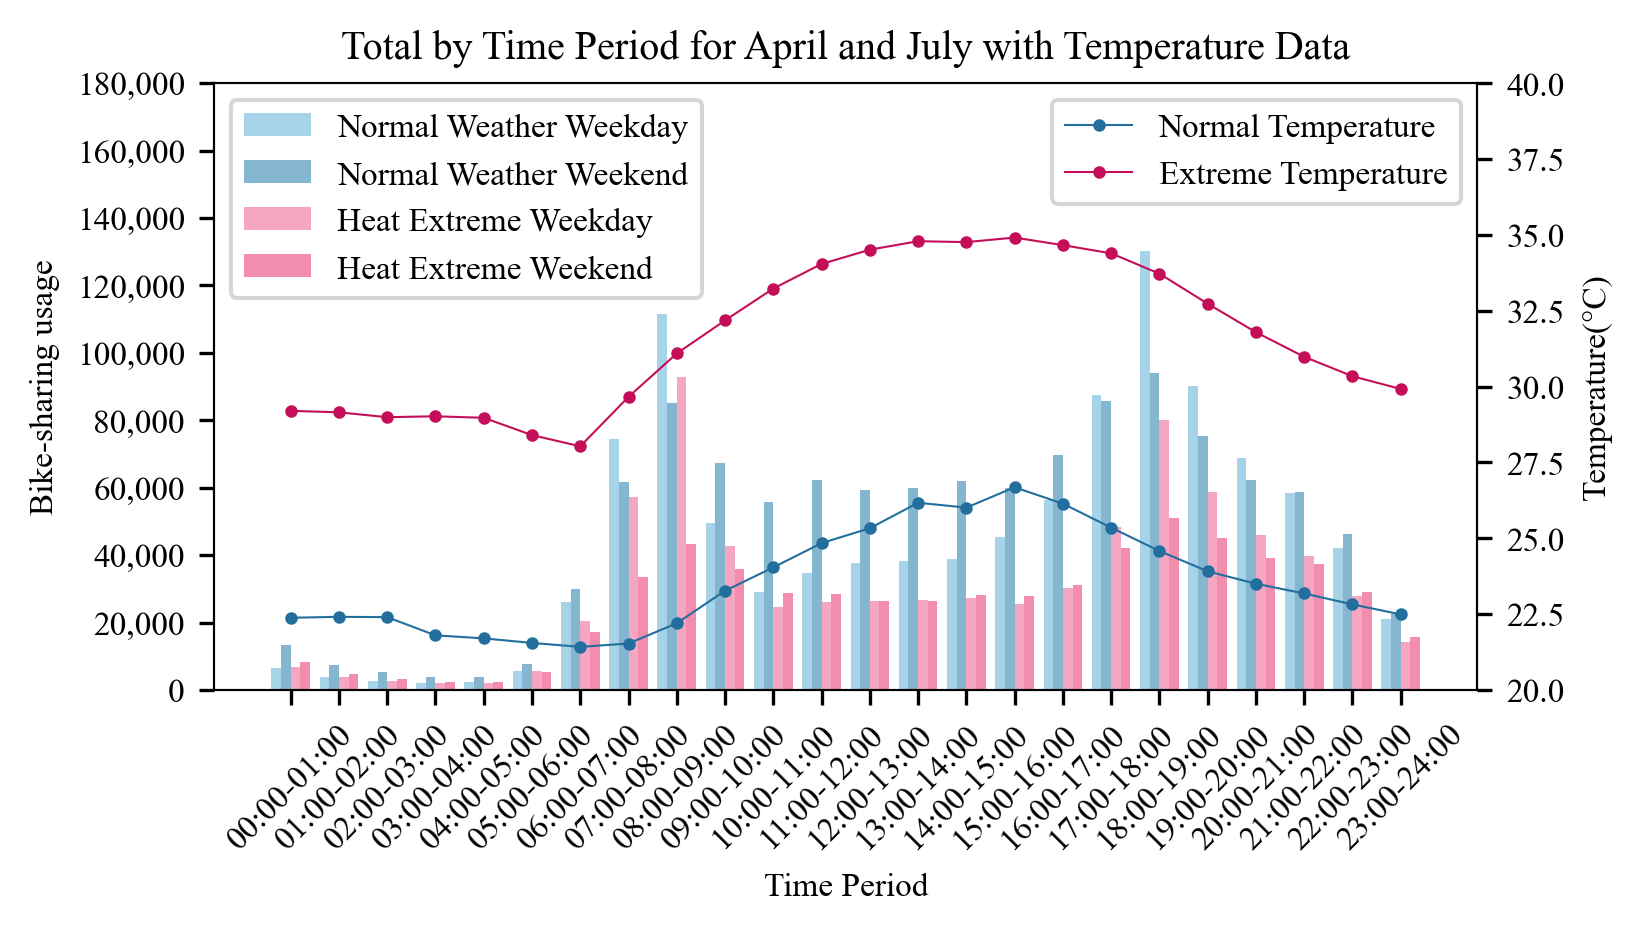

In [103]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths (April and July)
april_files = [f'./data/combined_output300/2021-04-{i:02d}.csv' for i in range(8, 15)]
july_files = [f'./data/combined_output300/2021-07-{i:02d}.csv' for i in range(8, 15)]

# Define weekday and weekend
weekend_days = [10, 11]  # 10th and 11th are weekends

# Define function: read data and calculate weekday/weekend average
def calculate_weekday_weekend_totals(file_list):
    weekday_totals = []
    weekend_totals = []
    
    for file in file_list:
        if os.path.exists(file):
            df = pd.read_csv(file)
            day = int(file.split('-')[-1].split('.')[0])
            if day in weekend_days:
                weekend_totals.append(df.iloc[:, 1:].sum())
            else:
                weekday_totals.append(df.iloc[:, 1:].sum())
    
    # Calculate average
    weekday_avg = pd.DataFrame(weekday_totals).mean()
    weekend_avg = pd.DataFrame(weekend_totals).mean()
    
    return weekday_avg, weekend_avg

# Calculate weekday/weekend averages for April and July
april_weekday_totals, april_weekend_totals = calculate_weekday_weekend_totals(april_files)
july_weekday_totals, july_weekend_totals = calculate_weekday_weekend_totals(july_files)

# Set font and font size
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 8

# Set bar plot parameters
bar_width = 0.2
index = np.arange(len(april_weekday_totals))

# Generate plot (14cm wide, 300dpi)
fig, ax1 = plt.subplots(figsize=(14 / 2.54, 8/ 2.54), dpi=300)
ax1.set_ylim(0, 180000)

# Plot April weekday/weekend bars (lighter colors)
ax1.bar(index - 1.5 * bar_width, april_weekday_totals.values, bar_width, label='Normal Weather Weekday', color='#a7d3e9')  # Light blue
ax1.bar(index - 0.5 * bar_width, april_weekend_totals.values, bar_width, label='Normal Weather Weekend', color='#85b6d1')  # Lighter blue

# Plot July weekday/weekend bars (lighter colors)
ax1.bar(index + 0.5 * bar_width, july_weekday_totals.values, bar_width, label='Heat Extreme Weekday', color='#f4a6c3')  # Light pink
ax1.bar(index + 1.5 * bar_width, july_weekend_totals.values, bar_width, label='Heat Extreme Weekend', color='#f28dae')  # Lighter pink

# Add title and labels
ax1.set_title('Total by Time Period for April and July with Temperature Data')
ax1.set_xlabel('Time Period')
ax1.set_ylabel('Bike-sharing usage')
ax1.set_xticks(index)
ax1.set_xticklabels(april_weekday_totals.index, rotation=45)

import matplotlib.ticker as ticker

# Format y-axis labels with thousand separators
formatter = ticker.FuncFormatter(lambda x, _: '{:,}'.format(int(x)))
ax1.yaxis.set_major_formatter(formatter)

# Add legend
ax1.legend(loc='upper left')

# ===== Keep the original temperature data reading and plotting =====
temperature_2104 = df_t_2104.loc['气温(℃)'].values.astype(float)
temperature_2107 = df_t_2107.loc['气温(℃)'].values.astype(float)

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylim(20, 40)
ax2.plot(index, temperature_2104, label='Normal Temperature', color='#226e9c', marker='o', linestyle='-', linewidth=0.5, markersize=2)
ax2.plot(index, temperature_2107, label='Extreme Temperature', color='#c40f58', marker='o', linestyle='-', linewidth=0.5, markersize=2)

# Set secondary y-axis label
ax2.set_ylabel('Temperature(°C)')
ax2.legend(loc='upper right')

# Adjust border width
for spine in ['top', 'bottom', 'left', 'right']:
    ax1.spines[spine].set_linewidth(0.5)
    ax2.spines[spine].set_linewidth(0.5)

# Adjust layout to prevent label overlap
plt.tight_layout()

# Save plot to file (14cm wide, 300dpi)
output_dir = '/Users/lihang/Documents/CyclingPerception/resub_fig/time_plot/'
os.makedirs(output_dir, exist_ok=True)
output_file = os.path.join(output_dir, 'comparison.png')
plt.savefig(output_file, dpi=300, bbox_inches='tight')




In [49]:
import os
import pandas as pd

# 定义weekday和weekend文件
april_weekday_files = [f'./data/combined_output300/2021-04-{i:02d}.csv' for i in [8, 9, 12, 13, 14]]
april_weekend_files = [f'./data/combined_output300/2021-04-{i:02d}.csv' for i in [10, 11]]
july_weekday_files = [f'./data/combined_output300/2021-07-{i:02d}.csv' for i in [8, 9, 12, 13, 14]]
july_weekend_files = [f'./data/combined_output300/2021-07-{i:02d}.csv' for i in [10, 11]]

# 定义函数：对每个 ID 在每个时间段的数据取平均
def calculate_daily_mean(file_list):
    all_data = []
    
    for file in file_list:
        if os.path.exists(file):
            df = pd.read_csv(file)
            if not df.empty:
                # 按ID汇总，在每个时间段取均值
                daily_mean = df.groupby(df.columns[0]).mean()  # 按第1列（即ID）分组取均值
                all_data.append(daily_mean)
    
    if all_data:
        # 将所有天的数据合并，按相同 ID 汇总，取均值
        result_df = pd.concat(all_data).groupby(level=0).mean()
        return result_df
    else:
        print(f"⚠️ No valid data found in {file_list}")
        return pd.DataFrame()

# 计算 weekday 和 weekend 的新 DataFrame
april_weekday_df = calculate_daily_mean(april_weekday_files)
april_weekend_df = calculate_daily_mean(april_weekend_files)
july_weekday_df = calculate_daily_mean(july_weekday_files)
july_weekend_df = calculate_daily_mean(july_weekend_files)


In [53]:
april_weekday_df.to_csv('./data/processed_bsu/4_wd.csv', index = True)
april_weekend_df.to_csv('./data/processed_bsu/4_we.csv', index =True)
july_weekday_df.to_csv('./data/processed_bsu/7_wd.csv', index = True)
july_weekend_df.to_csv('./data/processed_bsu/7_we.csv', index = True)

In [57]:
import pandas as pd

# 定义峰值和非峰值的时间段
peak_columns = ['07:00-08:00', '08:00-09:00', '09:00-10:00',
                '17:00-18:00', '18:00-19:00', '19:00-20:00']
non_peak_columns = ['10:00-11:00', '11:00-12:00', '12:00-13:00',
                    '13:00-14:00', '14:00-15:00', '15:00-16:00', '16:00-17:00']

# 定义函数：按时段汇总生成新表格
def calculate_peak_non_peak(df):
    result = pd.DataFrame(index=df.index)
    # 按列名汇总高峰时段和非高峰时段
    result['non_peak'] = df[non_peak_columns].sum(axis=1)
    result['peak'] = df[peak_columns].sum(axis=1)
    return result

# 生成新的 DataFrame（行索引为 ID）
april_weekday_peak_non_peak = calculate_peak_non_peak(april_weekday_df)
april_weekend_peak_non_peak = calculate_peak_non_peak(april_weekend_df)
july_weekday_peak_non_peak = calculate_peak_non_peak(july_weekday_df)
july_weekend_peak_non_peak = calculate_peak_non_peak(july_weekend_df)


In [65]:
import pandas as pd

# 定义峰值和非峰值的时间段
peak_columns = ['07:00-08:00', '08:00-09:00', '09:00-10:00',
                '17:00-18:00', '18:00-19:00', '19:00-20:00']
non_peak_columns = ['10:00-11:00', '11:00-12:00', '12:00-13:00',
                    '13:00-14:00', '14:00-15:00', '15:00-16:00', '16:00-17:00']

# 定义函数：按时段汇总生成新表格
def calculate_peak_non_peak(df):
    result = pd.DataFrame(index=df.index)
    # 按列名汇总高峰时段和非高峰时段
    result['non_peak'] = df[non_peak_columns].sum(axis=1)
    result['peak'] = df[peak_columns].sum(axis=1)
    return result

# 生成新的 DataFrame（行索引为 ID）
april_weekday_peak_non_peak = calculate_peak_non_peak(april_weekday_df).add_suffix('_4_wd')
april_weekend_peak_non_peak = calculate_peak_non_peak(april_weekend_df).add_suffix('_4_we')
july_weekday_peak_non_peak = calculate_peak_non_peak(july_weekday_df).add_suffix('_7_wd')
july_weekend_peak_non_peak = calculate_peak_non_peak(july_weekend_df).add_suffix('_7_we')

# 🔥 将4个DataFrame横向合并
combined_df = pd.concat([
    april_weekday_peak_non_peak,
    april_weekend_peak_non_peak,
    july_weekday_peak_non_peak,
    july_weekend_peak_non_peak
], axis=1)


,non_peak_4_wd,peak_4_wd,non_peak_4_we,peak_4_we,non_peak_7_wd,peak_7_wd,non_peak_7_we,peak_7_we
Fishnet_ID,,,,,,,,
0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4447,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4448,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4449,2.2,4.6,4.5,5.0,2.6,5.2,3.5,8.5


In [67]:
output_path = './data/processed_bsu/combined_peak_non_peak.csv'
combined_df.to_csv(output_path, index=True)